### Importing necessary Libraries

In [27]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# if you have not installed these libraries first install these libraries on your system

### Reading the Dataset

In [2]:
df = pd.read_excel("reviews.xlsx")

In [3]:
df[df['Review Text'].isnull()]

,Review Text,Date,Reviewer Name,Age range,Gender,Medication Timeline,Patient Status,Condition,Overall Rating,Effectiveness Rating,Ease Of Use Rating,Satisfaction Rating,Thumbs Up,Thumbs Down,Total Thumbs/Votes
45,NaN,8/9/2013,ozie,75 or over,Female,On medication for 1 to 6 months,Patient,Blood Clot in Lung,3.7,3,5,3,3,3,0
48,NaN,7/10/2013,Anonymous,75 or over,Male,On medication for 1 to less than 2 years,Patient,Heart Failure with Paroxysmal Atrial Fibrillation,2.7,3,3,2,0,0,0
62,NaN,3/21/2013,Anonymous,65-74,Female,On medication for 1 to less than 2 years,Patient,Heart Failure with Paroxysmal Atrial Fibrillation,4.7,5,5,4,0,0,0
67,NaN,2/12/2013,bill,55-64,Male,On medication for 1 to 6 months,NaN,Blood Clot in a Deep Vein,3.0,3,3,3,0,0,0
73,NaN,12/30/2012,bernie,65-74,Male,On medication for 1 to 6 months,Patient,Heart Failure with Paroxysmal Atrial Fibrillation,2.7,3,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,NaN,11/2/2007,elijah,45-54,Male,On medication for 1 to less than 2 years,Patient,Blood Clots in Deep Veins and in Blood Vessel ...,3.7,4,3,4,4,3,1
595,NaN,11/1/2007,Anonymous,NaN,NaN,NaN,NaN,Blood Clot in a Deep Vein,3.3,3,4,3,3,2,1
597,NaN,10/30/2007,Anonymous,35-44,Female,On medication for 10 years or more,Patient,Blood Clot,4.7,5,4,5,2,3,-1
600,NaN,10/22/2007,Anonymous,19-24,Male,On medication for 2 to less than 5 years,Patient,Blood Clot,4.7,5,4,5,2,2,0


### Data Preprocessing 

In [54]:
# Remove NaN values from 'Review Text' column
df = df.dropna(subset=['Review Text'])

In [55]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [56]:
# Tokenization and stop words removal
df['Cleaned Text'] = df['Review Text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

In [58]:
# Display the cleaned data
print(df[['Review Text', 'Cleaned Text']].head())

                                         Review Text  \
0  Headache,gum pain,nausea,muscle pain,hair loss...   
1  This is rat poison, this drug shouldn't be con...   
2  I’m a 35yr old female that has been on Coumadi...   
3  Started taking it last month. Have been dizzy,...   
4  Well today I start this drug and I am very sca...   

                                        Cleaned Text  
0  headache gum pain nausea muscle pain hair loss...  
1  rat poison drug considered given anymore heada...  
2  old female coumadin since feb arterial thrombo...  
3  started taking last month dizzy headaches bala...  
4  well today start drug scared post go pe found ...  


### Topic Modeling:

In [59]:
# Create the TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Cleaned Text'])

#### LSA

In [77]:
num_topics = 10  # You can adjust the number of topics as needed
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

In [79]:
# Display the topics
for i in range(num_topics):
    print("Topic {}: {}".format(i + 1, ', '.join([vectorizer.get_feature_names_out()[idx] for idx in lsa_model.components_[i].argsort()[:-6:-1]])))


Topic 1: coumadin, blood, taking, drug, clots
Topic 2: valve, mechanical, coumadin, replacement, aortic
Topic 3: levels, blood, hard, regulate, right
Topic 4: regulate, hard, medication, hair, levels
Topic 5: drug, regulate, clots, effects, good
Topic 6: eat, days, vitamin, want, like
Topic 7: regulate, dosage, time, hard, day
Topic 8: inr, taking, drug, regulate, problems
Topic 9: problems, know, medication, inr, want
Topic 10: medication, regulate, blood, hard, started


#### LDA

In [80]:
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

In [81]:
# Display the topics
for i in range(num_topics):
    print(f"Topic {i + 1}: {', '.join(vectorizer.get_feature_names_out()[lda_model.components_[i].argsort()[:-6:-1]])}")

Topic 1: levels, blood, taking, high, coumadin
Topic 2: drug, blood, clots, coumadin, hard
Topic 3: ok, tired, coumadin, goes, bloodwork
Topic 4: know, coumadin, drug, dosage, want
Topic 5: hair, coumadin, blood, effects, medication
Topic 6: taking, blood, coumadin, level, regulate
Topic 7: coumadin, use, life, taking, months
Topic 8: valve, coumadin, blood, drug, weeks
Topic 9: coumadin, drug, valve, great, blood
Topic 10: medication, trouble, blood, inr, coumadin


### NMF

In [82]:
# Apply Non-Negative Matrix Factorization (NMF)
nmf_model = NMF(n_components=num_topics, init='nndsvd', random_state=42)
nmf_topic_matrix = nmf_model.fit_transform(tfidf_matrix)

In [83]:
# Display the topics
for i in range(num_topics):
    print(f"Topic {i + 1}: {', '.join(vectorizer.get_feature_names_out()[nmf_model.components_[i].argsort()[:-6:-1]])}")

Topic 1: blood, clots, lungs, leg, clot
Topic 2: valve, mechanical, replacement, aortic, heart
Topic 3: inr, trouble, regulated, pt, mg
Topic 4: regulate, hard, dosage, difficult, trying
Topic 5: medication, started, doctor, know, headaches
Topic 6: eat, days, day, fish, twice
Topic 7: levels, high, low, change, right
Topic 8: coumadin, taking, months, told, dvt
Topic 9: drug, effects, problems, good, know
Topic 10: hair, tired, loss, time, medicine


## EDA

### Distribution of Overall Ratings


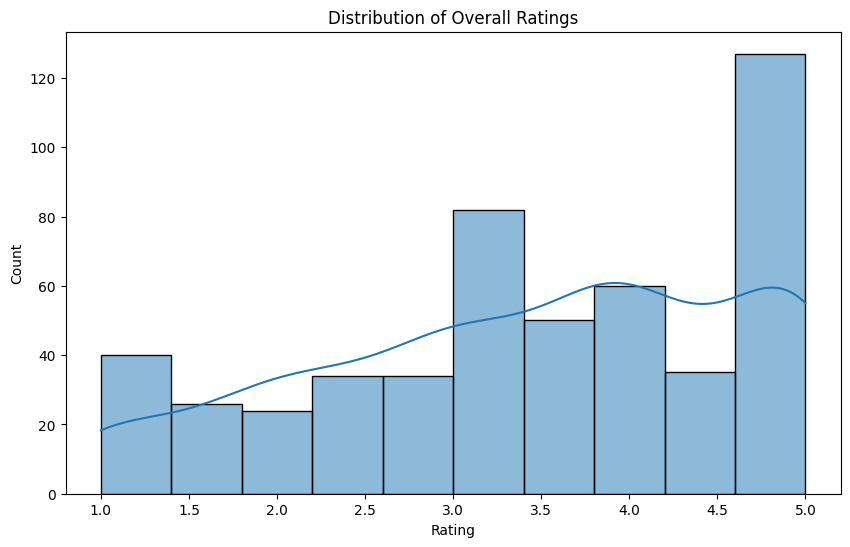

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall Rating'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Age Range Distribution


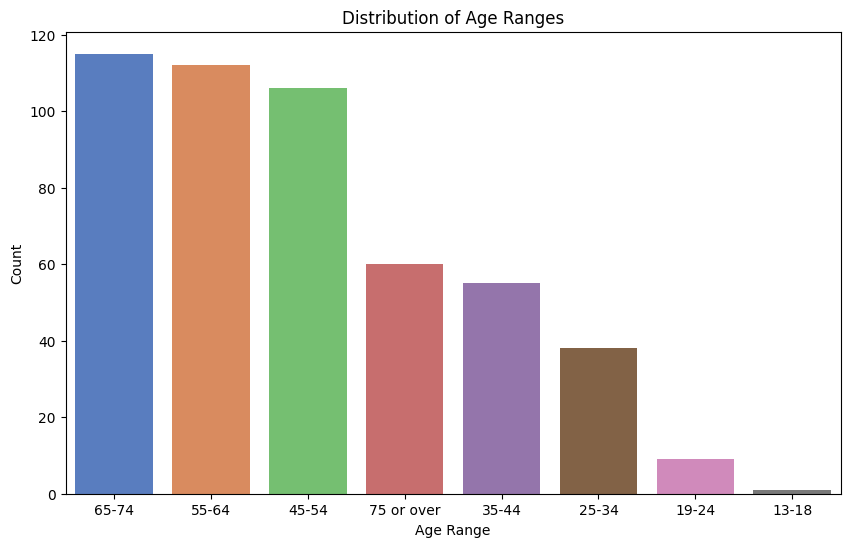

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age range', data=df, order=df['Age range'].value_counts().index, palette='muted')
plt.title('Distribution of Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

### Gender Distribution

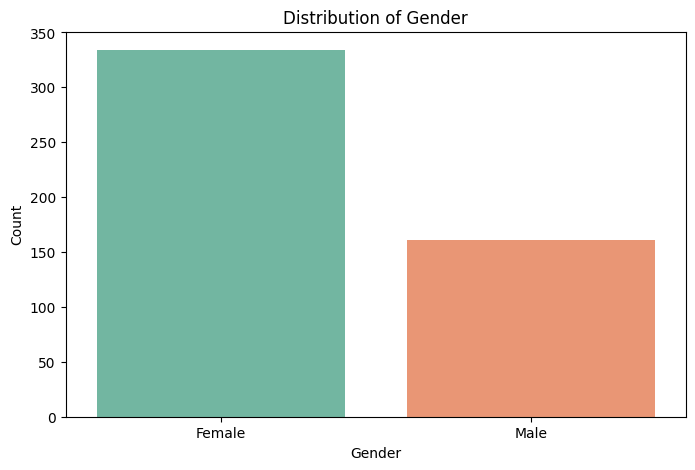

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Distribution of Thumbs Up and Thumbs Down


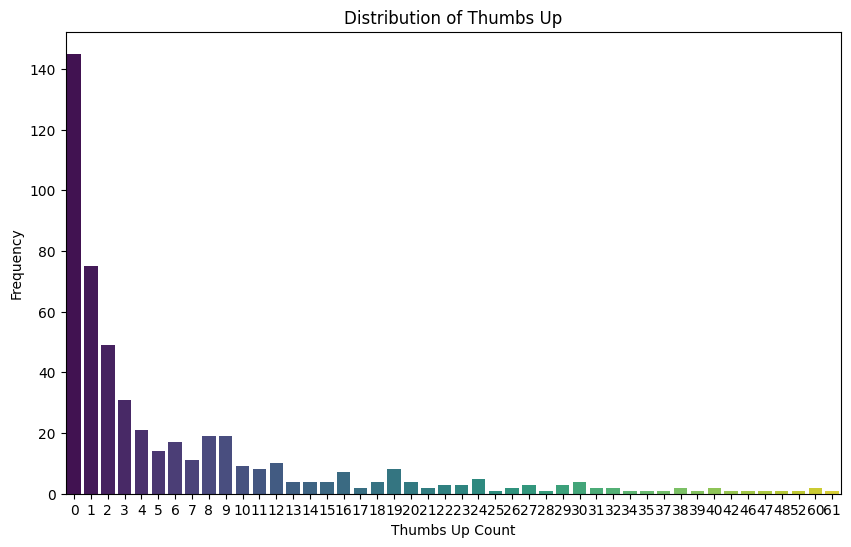

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thumbs Up', data=df, palette='viridis')
plt.title('Distribution of Thumbs Up')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()

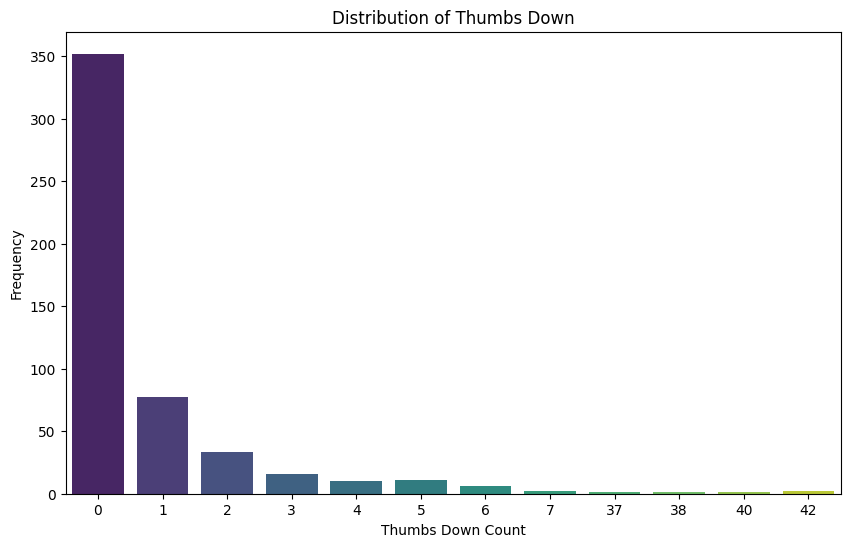

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thumbs Down', data=df, palette='viridis')
plt.title('Distribution of Thumbs Down')
plt.xlabel('Thumbs Down Count')
plt.ylabel('Frequency')
plt.show()

### Review Length analysis

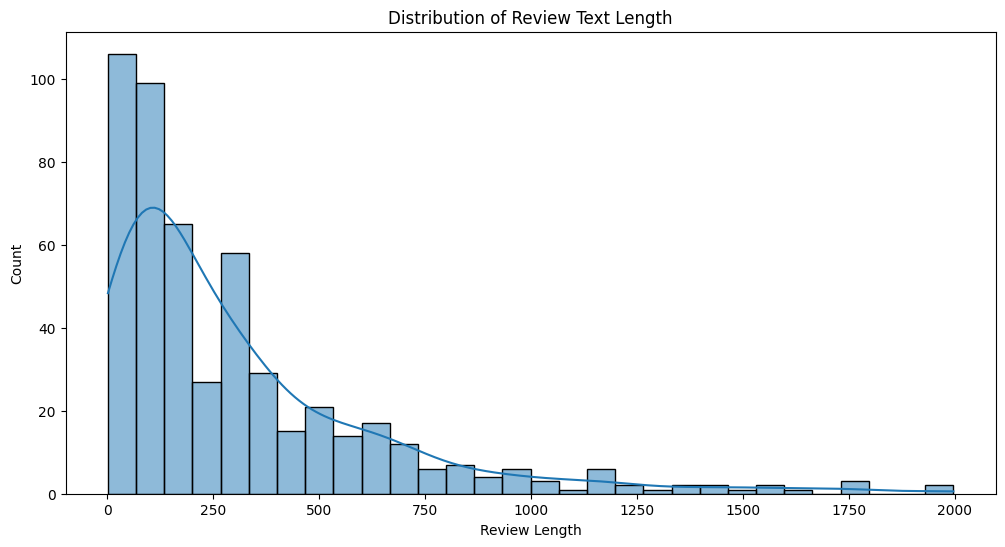

In [41]:
# Distribution of Review Text Length
df['Review Length'] = df['Review Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['Review Length'], bins=30, kde=True)
plt.title('Distribution of Review Text Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

### Timeline analysis

C:\Users\Awais Nayyar\AppData\Local\Temp\ipykernel_4936\2884670066.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Total Thumbs/Votes', data=df, estimator='sum', ci=None)


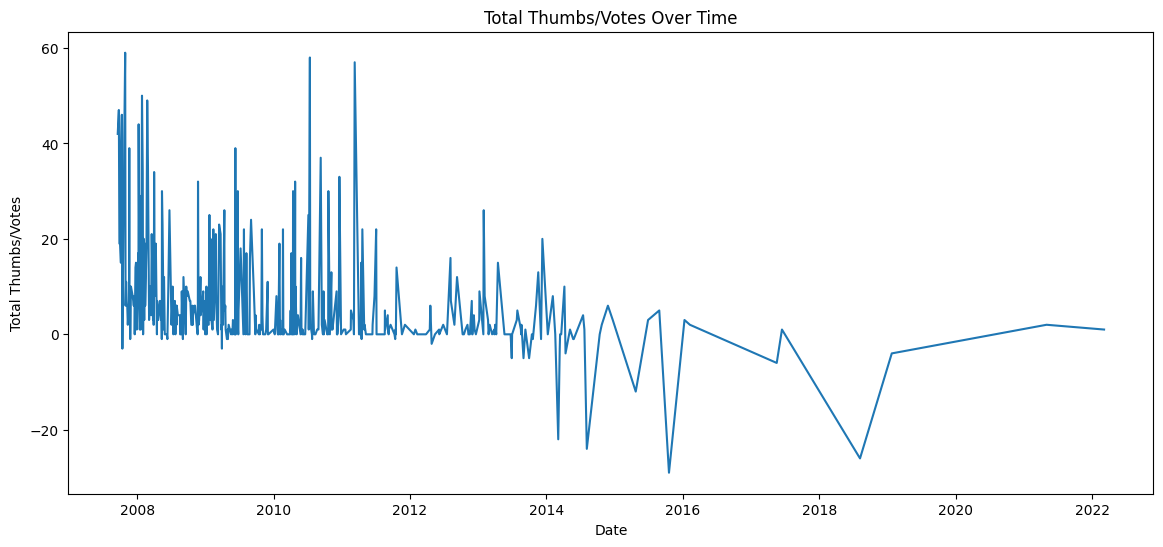

In [43]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Distribution of reviews over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Total Thumbs/Votes', data=df, estimator='sum', ci=None)
plt.title('Total Thumbs/Votes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Thumbs/Votes')
plt.show()

### EDA on all numerical columns

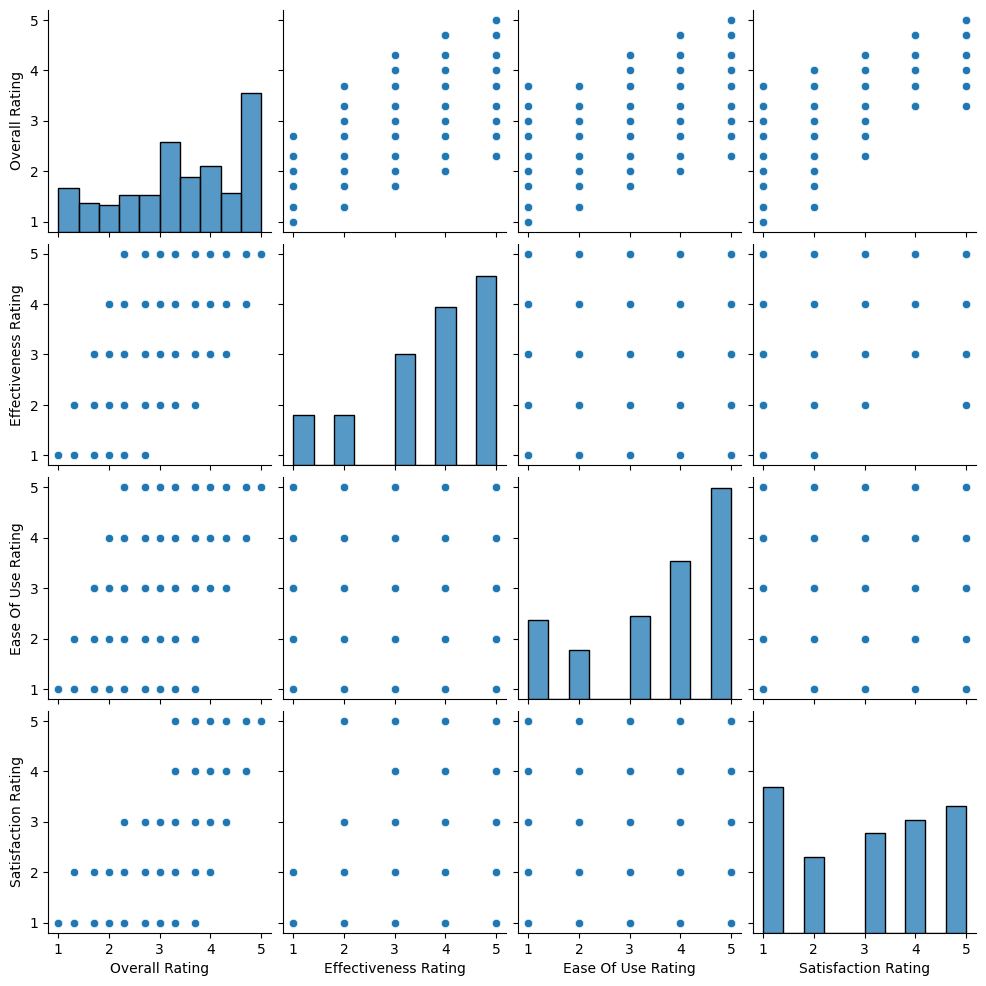

In [51]:
sns.pairplot(df[['Overall Rating', 'Effectiveness Rating', 'Ease Of Use Rating', 'Satisfaction Rating']])
plt.show()